<a href="https://colab.research.google.com/github/MDRumman2019/PDS-11-25/blob/main/project2_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [71]:
df1=pd.read_csv('TT-1.csv')
df2=pd.read_csv('TT-2.csv')
df1.head()

,Reg. No.,Names,TT1 Marks
0,2017132035,Abdul Rahman,7.0
1,2018132012,Aminul Islam,7.0
2,2018132014,Anwar Hossain,12.0
3,2018132036,Ashraf Ali,14.0
4,2018132041,Imran Hossain,11.0


In [70]:
df2.head()

,Reg. No.,Names,TT2 Marks
0,2017132035,Abdul Rahman,5.5
1,2018132014,Aminul Islam,3.5
2,2018132036,Anwar Hossain,6.0
3,2018132041,Ashraf Ali,8.0
4,2018132043,Imran Hossain,8.0


In [55]:
df=pd.merge(df_tt1,df_tt2,on=["Reg. No."],how="inner")
df.head()

,Reg. No.,TT1 Marks,TT2 Marks
0,2017132035,7.0,5.5
1,2018132014,12.0,3.5
2,2018132036,14.0,6.0
3,2018132041,11.0,8.0
4,2018132043,14.0,8.0


In [56]:
df["Best_term_test_marks"]=df.loc[:,["TT1 Marks","TT2 Marks"]].max(axis=1)
df["Average_term_test_marks"]=df.loc[:,["TT1 Marks","TT2 Marks"]].mean(axis=1)

In [57]:
df.drop(["TT1 Marks","TT2 Marks"],axis=1,inplace=True)

In [58]:
df.head()

,Reg. No.,Best_term_test_marks,Average_term_test_marks
0,2017132035,7.0,6.25
1,2018132014,12.0,7.75
2,2018132036,14.0,10.00
3,2018132041,11.0,9.50
4,2018132043,14.0,11.00


In [59]:
at=pd.read_csv("Attendance.csv")
df=pd.merge(df,at,on=["Reg. No."],how="left")


In [60]:
import random
df["Term Final Marks"]=np.array(random.randint(47,93) for i in range(50))
df["Final Marks"]=df["Term Final Marks"]*0.7+df["Attendance"]+df["Average_term_test_marks"]
df.head()

,Reg. No.,Best_term_test_marks,Average_term_test_marks,Names,Attendance,Term Final Marks,Final Marks
0,2017132035,7.0,6.25,Aminul Islam,23,75,81.75
1,2018132014,12.0,7.75,Kamal Uddin,30,70,86.75
2,2018132036,14.0,10.00,Mahbub Alam,29,49,73.3
3,2018132041,11.0,9.50,Mizanur Rahman,32,79,96.8
4,2018132043,14.0,11.00,Rafiqur Rahman,32,81,99.7


In [61]:
df.to_csv("final term test result.csv",index=False)


In [62]:
from google.colab import files
files.download("final term test result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
X=df[["Average_term_test_marks","Final Marks"]].values
X

array([[6.25, 81.75],
       [7.75, 86.75],
       [10.0, 73.3],
       [9.5, 96.8],
       [11.0, 99.69999999999999],
       [11.0, 103.1],
       [10.25, 83.35],
       [8.5, 98.0],
       [11.75, 113.14999999999999],
       [8.75, 81.15],
       [12.5, 110.1],
       [9.0, 95.0],
       [6.75, 85.94999999999999],
       [14.75, 87.94999999999999],
       [15.75, 101.85],
       [12.0, 95.4],
       [12.0, 92.5],
       [11.75, 89.75],
       [14.0, 106.3],
       [8.25, 102.15],
       [9.5, 94.5],
       [13.0, 115.1],
       [7.25, 82.65],
       [11.25, 98.44999999999999],
       [3.0, 65.8],
       [15.25, 109.65],
       [12.0, 106.3],
       [11.5, 82.8],
       [11.5, 96.69999999999999],
       [14.0, 92.1],
       [6.0, 80.8],
       [8.0, 80.9],
       [12.0, 88.69999999999999],
       [13.25, 93.75],
       [13.5, 90.1],
       [13.0, 88.6],
       [9.5, 83.0],
       [16.0, 93.3],
       [9.5, 103.3],
       [13.25, 80.55],
       [9.25, 109.35],
       [14.0, 112.6999999

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

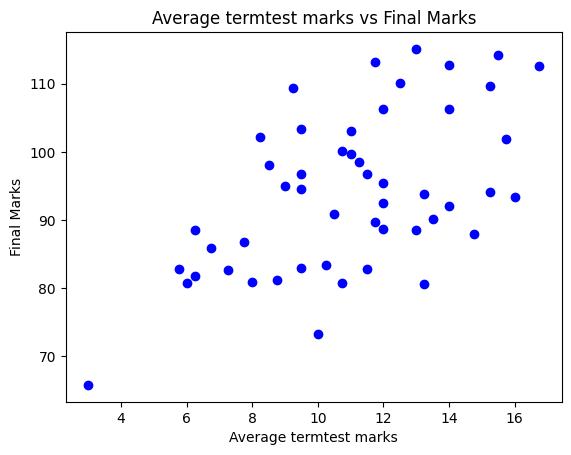

In [65]:
plt.scatter(x=X[:,0],y=X[:,1],color="blue")
plt.xlabel("Average termtest marks")
plt.ylabel("Final Marks")
plt.title("Average termtest marks vs Final Marks")
plt.show()

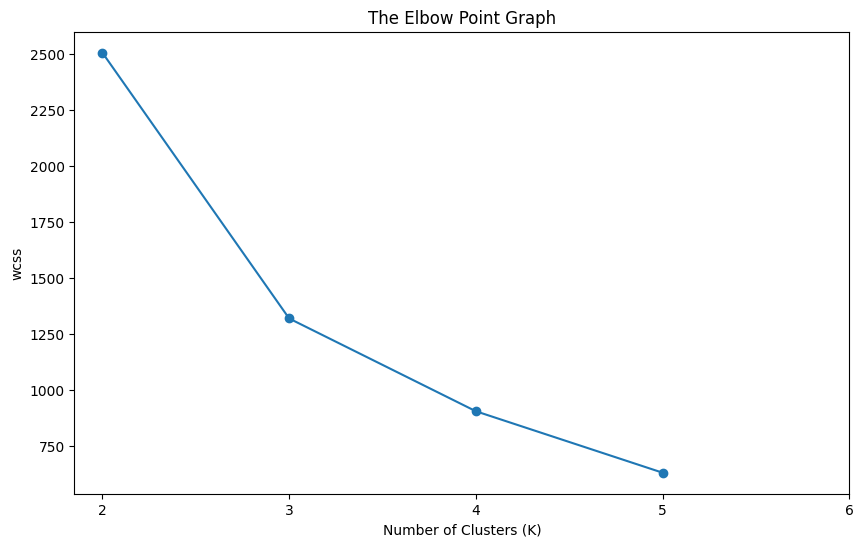

In [66]:
wcss=[]
for i in range(2,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2,6), wcss)
plt.scatter(range(2,6), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.xticks([2,3,4,5,6])
plt.show()

In [67]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
Y

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2,
       1, 2, 0, 1, 0, 0], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[  8.98684211,  82.42894737],
       [ 13.4       , 110.94      ],
       [ 11.60714286,  96.25952381]])

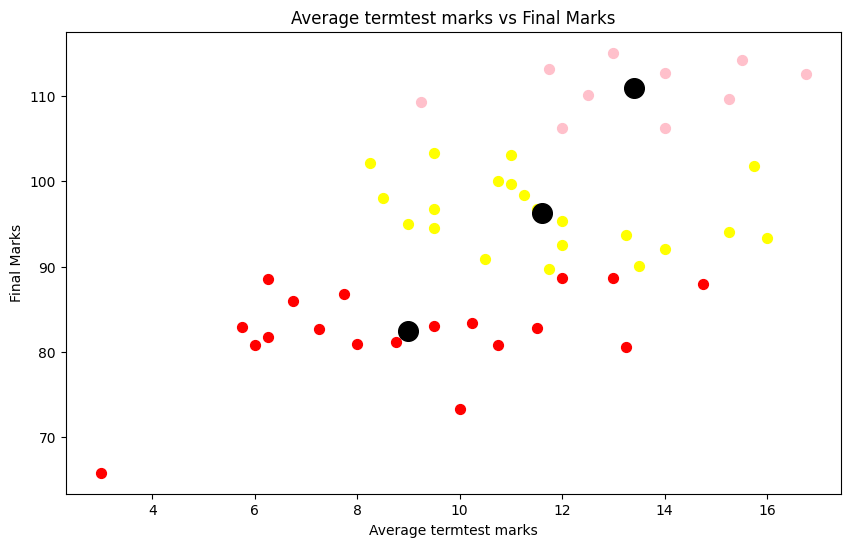

In [69]:

plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.xlabel("Average termtest marks")
plt.ylabel("Final Marks")
plt.title("Average termtest marks vs Final Marks")
plt.show()